# Homework II

### Grupo 003

(ist1107028) Inês Paredes

(ist1107137) Margarida Lourenço


## II. Programming [7v]

Consider the heart-disease.csv dataset available at the course webpage’s homework tab.
Using sklearn, apply a 5-fold stratiﬁed cross-validation with shuﬄing (random_state=0) for the
assessment of predictive models along this section.

**1) Compare the performance of a with and a naïve Bayes with Gaussian𝑘𝑁𝑁 𝑘 = 5
assumption (consider all remaining parameters as default):**

**a. [1.0v] Plot two boxplots with the fold accuracies for each classiﬁer. Is there one
more stable than the other regarding performance? Why do you think that is the
case? Explain.**

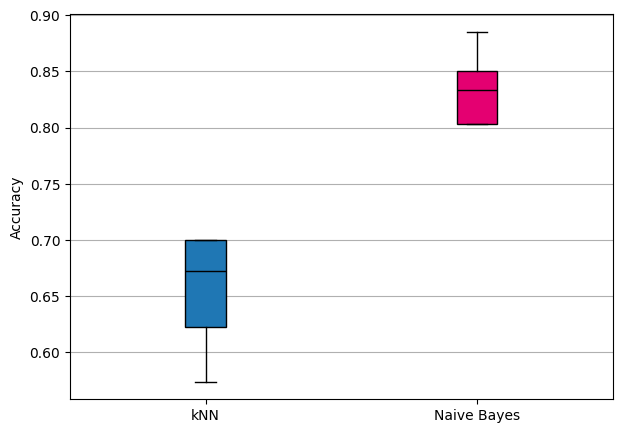

In [5]:
import matplotlib.pyplot as plt, pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Read the dataset
df = pd.read_csv("./heart-disease.csv")
X, y = df.drop("target", axis=1), df["target"]

# Define cross-validation strategy
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize classifiers
knn_predictor = KNeighborsClassifier(n_neighbors=5)
nb_predictor = GaussianNB()

# Evaluate classifiers
knn_accs = cross_val_score(knn_predictor, X, y, cv=folds, scoring="accuracy")
nb_accs = cross_val_score(nb_predictor, X, y, cv=folds, scoring="accuracy")

# Plot boxplots
plt.figure(figsize=(7, 5))
b_plot = plt.boxplot(
    [knn_accs, nb_accs], patch_artist=True, labels=["kNN", "Naive Bayes"]
)

colors = ["#1f77b4", "#E40071"]
for patch, color in zip(b_plot["boxes"], colors):
    patch.set_facecolor(color)
for median in b_plot["medians"]:
    median.set_color("black")

plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.show()


**b. [1.0v] Report the accuracy of both models, this time scaling the data with a
Min-Max scaler before training the models. Explain the impact that this
preprocessing step has on the performance of each model, providing an
explanation for the results.**

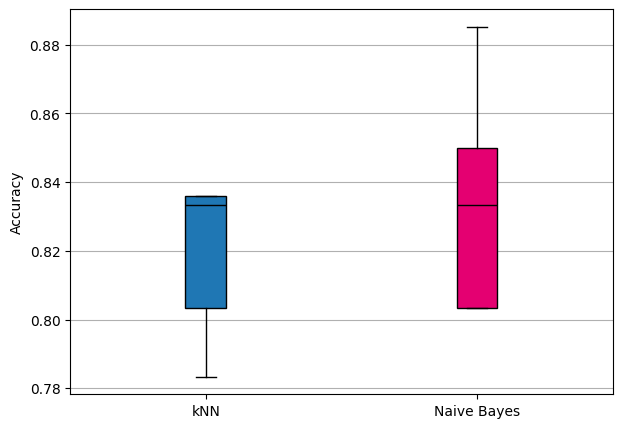

In [8]:
import matplotlib.pyplot as plt, pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Read the ARFF file and prepare data
df = pd.read_csv("./heart-disease.csv")
X, y = df.drop("target", axis=1), df["target"]

# Define cross-validation strategy
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create pipelines for scaling
knn_pipeline = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))])
nb_pipeline = Pipeline([("scaler", MinMaxScaler()), ("nb", GaussianNB())])

# Evaluate classifiers
knn_accs = cross_val_score(knn_pipeline, X, y, cv=folds, scoring="accuracy")
nb_accs = cross_val_score(nb_pipeline, X, y, cv=folds, scoring="accuracy")

# Plot boxplots
plt.figure(figsize=(7, 5))
b_plot = plt.boxplot(
    [knn_accs, nb_accs], patch_artist=True, labels=["kNN", "Naive Bayes"]
)

colors = ["#1f77b4", "#E40071"]
for patch, color in zip(b_plot["boxes"], colors):
    patch.set_facecolor(color)
for median in b_plot["medians"]:
    median.set_color("black")

plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.show()


**c. [1.0v] Using scipy, test the hypothesis “the model is statistically superior to𝑘𝑁𝑁
naïve Bayes regarding accuracy”, asserting whether it is true.**

In [9]:
from scipy.stats import ttest_rel

# Is kNN better than Naive Bayes?
res = ttest_rel(knn_accs, nb_accs, alternative="greater")
print("Is kNN > Naive Bayes? pval =", res.pvalue)

Is kNN > Naive Bayes? pval = 0.8259913182205001


**2) Using a 80-20 train-test split, vary the number of neighbors of a classiﬁer using𝑘𝑁𝑁
. Additionally, for each , train one classiﬁer using uniform weights𝑘 = {1, 5, 10, 20, 30} 𝑘
and distance weights.**

**a. [1.0v] Plot the train and test accuracy for each model.**

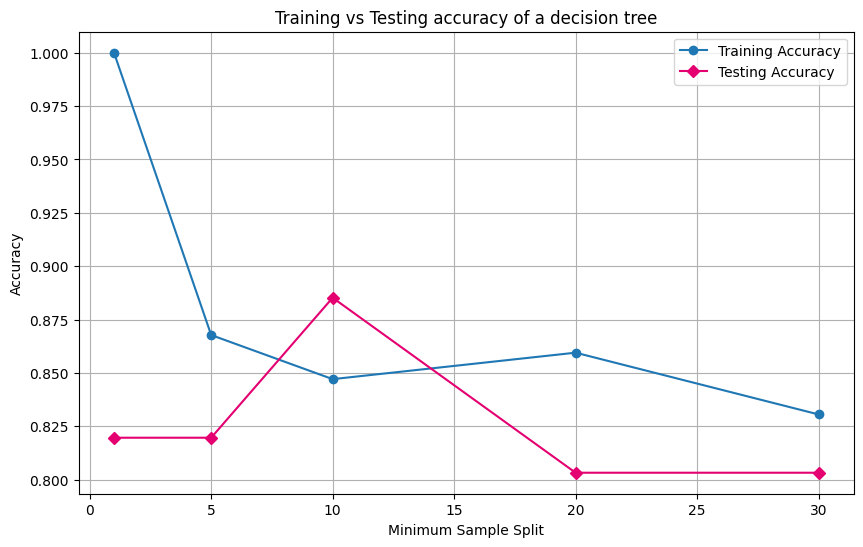

In [15]:
import matplotlib.pyplot as plt, pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the dataset
df = pd.read_csv("./heart-disease.csv")
X, y = df.drop("target", axis=1), df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler().fit(X_train)
uniform_weights = [1, 5, 10, 20, 30]
x, x_train, x_test = scaler.transform(X), scaler.transform(X_train), scaler.transform(X_test)

train_acc, test_acc = [], []

for w in uniform_weights:
    predictor = KNeighborsClassifier(n_neighbors=w, weights="uniform")
    predictor.fit(x_train, y_train)
    y_pred = predictor.predict(x_test)
    y_pred_prob = predictor.predict_proba(x_test)[:,1]
    train_acc.append(predictor.score(x_train, y_train))
    test_acc.append(predictor.score(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(
    uniform_weights, 
    train_acc, 
    label='Training Accuracy', 
    marker='o',
)
plt.plot(
    uniform_weights, 
    test_acc, 
    label='Testing Accuracy', 
    marker='D',
    color='#E40071'
)
plt.xlabel('Minimum Sample Split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Testing accuracy of a decision tree')
plt.grid(True)
plt.show()


**b. [1.5v] Explain the impact of increasing the neighbors on the generalization ability of
the models.**

**3) [1.5v] Considering the unique properties of the heart-disease.csv dataset, identify two
possible diﬃculties of the naïve Bayes model used in the previous exercises when learning
from the given dataset.**